# Introduction and motivation

There is a strange result concerning the uniform distribution on the P-ball in high dimension :
<br>
Let's have

$$ X^{(p)} \sim \mathcal{U}(\mathcal{B_p(1)}) $$

with

$$ \mathcal{B_p(r)} = \{ x \in \mathbb{R^p} , \lVert x \rVert \leq r \} \quad \lVert \rVert \text{ being the standard euclidean distance} $$

Then

$$ E(\lVert X^{(p)} \rVert^2) \underset{p \to +\infty}{\overset{}{\longrightarrow}}1$$

That is to say that in large dimensions, all the draws of a uniform distribution on the unit ball are concentrated on the edge.
The Mathematical proof is at the end of this Notebook.

I found something interesting while trying to simulate this result. One of the first challenge is to uniformly sampling a p-ball. An elegant method for doing so [Barthe, 2005](https://arxiv.org/abs/math/0503650) is to randomly draw $p$ coordinates $X_1,…,X_p$ i.i.d from a standard normal distribution. Also sample Y from the exponential distribution with parameter $\lambda=1$. Then the desired sample is :

$$\frac{(X_1,...,X_p)}{\sqrt{Y+\sum_1^{p}X_i^2}}$$

However, and as mentionned [here](http://extremelearning.com.au/how-to-generate-uniformly-random-points-on-n-spheres-and-n-balls/), I found empirical evidence in this notebook that the right parameter for the exponential distribution should be $\lambda = 1/2$.

# Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

## Functions

In [2]:
# Create the desired number of sample of uniform random variable on the d-ball 

def random_nball(d = 1,sample = 1,exp_param = 2): # the exp_param is here to prove the point
    
    x = np.random.normal(0,1,d * sample) # normal
    x = x.reshape(sample,d) 
    e = np.random.exponential(exp_param,size = sample) # exponential
    e = e.reshape(sample,1)
    for_denom = np.concatenate((x**2,e),axis = 1) # concat with  x**2
    denom = (np.sum(for_denom,axis=1))**0.5
    
    return (x / denom[:,None])

In [3]:
def monte_carlo(array):
    return (np.mean((LA.norm(array,axis = 1)**2)))

## Curve

In [4]:
#calculate the expected value for each dimension from 1 to to 50 with monte-carlo algorithm with n = 10 000

dim = [i+1 for i in range(50)] 
results =[]
for i in dim:
    results.append(monte_carlo(random_nball(d = i,sample = 10000,exp_param = 1))) 

In [5]:
#theorical results for the Expected value
th_results = [(i)/(i+2) for i in dim]

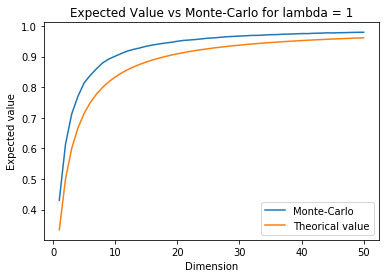

In [6]:
plt.plot(dim,results,label = 'Monte-Carlo')
plt.plot(dim,th_results,label = "Theorical value")
plt.title('Expected Value vs Monte-Carlo for lambda = 1')
plt.ylabel('Expected value')
plt.xlabel('Dimension')
plt.legend(loc='lower right')
plt.show()

The two curves do not seem to match. Let's plot the errors :



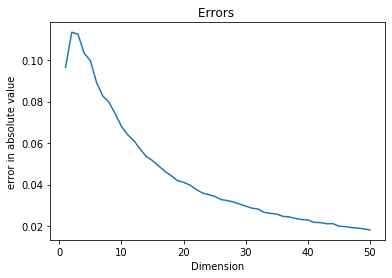

In [7]:
plt.plot(dim,np.abs(np.array(results)-np.array(th_results)))
plt.title('Errors ')
plt.ylabel('error in absolute value')
plt.xlabel('Dimension')
plt.show()

With parameter $ \lambda = 1/2$

In [8]:
results =[]
for i in dim:
    results.append(monte_carlo(random_nball(d = i,sample = 10000,exp_param = 2))) 
# we use 2 for the parameter because numpy uses Beta = 1/lambda for exponential simulation

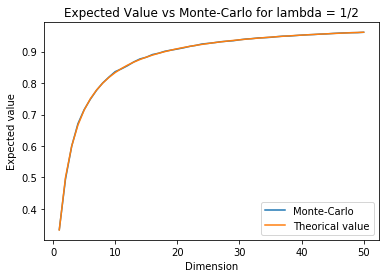

In [9]:
plt.plot(dim,results,label='Monte-Carlo')
plt.plot(dim,th_results,label = "Theorical value")
plt.title( 'Expected Value vs Monte-Carlo for lambda = 1/2')
plt.ylabel('Expected value')
plt.xlabel('Dimension')
plt.legend(loc='lower right')
plt.show()

a near perfect match

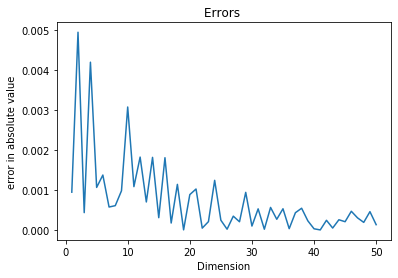

In [10]:
plt.plot(dim,np.abs(np.array(results)-np.array(th_results)))
plt.title('Errors ')
plt.ylabel('error in absolute value')
plt.xlabel('Dimension')
plt.show()
plt.show()

# Proof

first let's proove that



$$V_p(r) = r^pV_p(1)$$

with

$$\begin{align} V_p(r) &= \text{Volume}(\mathcal{B_p(r)}) \nonumber \\ 
&= \int_{\mathbb{R}^p} \mathbb{1}_{\lVert x \rVert \leq r} \,dx \end{align} \nonumber $$

$\text{let's } g(x) = (rx_1,...,rx_p) \\  
\phi_g(x) = r\mathcal{I}_p \\
|\det \phi_g(x)| = r^p$



$$\begin{align} V_p(r) &= \int_{\mathbb{R}^p} \mathbb{1}_{|r| \lVert x \rVert \leq r}r^p \,dx \quad \text{ by substitution } \\ &=r^p \int_{\mathbb{R}^p} \mathbb{1}_{ \lVert x \rVert \leq 1} \,dx \\ &=r^pV_p(1) \end{align}  $$

$ \text{with } X^{(p)} \sim \mathcal{U}(\mathcal{B_p(1)}) \text{ we have } f_X(x) = \Large\frac{\mathbb{1}_{ \lVert x \rVert \leq 1} }{V_p(1)} \\
\text{and } P( \lVert X^{(p)} \rVert \leq r) = 1 \quad (\text{ if } r > 1) \\
\text{ if } r \leq 1 :$

$$\begin{align} P( \lVert X^{(p)} \rVert \leq r) &= \int_{\mathbb{R}^p} \mathbb{1}_{ \lVert x \rVert \leq r} \frac{\mathbb{1}_{ \lVert x \rVert \leq 1} }{V_p(1)} \,dx \\ &=\frac{1}{V_p(1)} \int_{\mathbb{R}^p} \mathbb{1}_{ \lVert x \rVert \leq r}\,dx \\ &=r^p \end{align} \nonumber $$
$\text{Then we can derive } E(\lVert X^{(p)} \rVert^2)$

$$\begin{align} E(\lVert X^{(p)} \rVert^2) &= \int_{\mathbb{R}^+} P(\lVert X^{(p)} \rVert^2 > t) \,dt \\ &=\int_{\mathbb{R}^+} (1 - P(\lVert X^{(p)} \rVert \leq \sqrt{t})) \,dt \\ &=\int_{0}^1 1 - t^{\frac{p}{2}} \,dt \\ &= \frac{p}{p+2} \end{align} \nonumber $$

Hence : 

$$E(\lVert X^{(p)} \rVert^2) \underset{p \to +\infty}{\overset{}{\longrightarrow}}1 \nonumber $$
